In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import math
import tensorflow as tf
import keras
import keras_tuner as kt
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras import callbacks
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Activation, Dropout, InputLayer, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from keras import layers, Sequential
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from keras import backend as K

In [38]:
df = pd.read_csv('../split_train_test_data./loan_approval_dataset.csv')
df = df.rename(columns=lambda x: x.strip())
print(df.shape)
print(df.dtypes)

(4269, 13)
loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object


In [39]:
df = df.drop('loan_id', axis=1).copy()
df = df.replace({'self_employed': {' No': 0, ' Yes': 1}})
df = df.replace({'education': {' Not Graduate': 0, ' Graduate': 1}})
df = df.replace({'loan_status': {' Approved': 1, ' Rejected': 0}})
# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   education                 4269 non-null   int64
 2   self_employed             4269 non-null   int64
 3   income_annum              4269 non-null   int64
 4   loan_amount               4269 non-null   int64
 5   loan_term                 4269 non-null   int64
 6   cibil_score               4269 non-null   int64
 7   residential_assets_value  4269 non-null   int64
 8   commercial_assets_value   4269 non-null   int64
 9   luxury_assets_value       4269 non-null   int64
 10  bank_asset_value          4269 non-null   int64
 11  loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 400.3 KB


In [40]:
X = df.drop('loan_status', axis=1).copy()
y = df['loan_status'].copy()

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_train = scale(X_train)
X_test = scale(X_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f"""
X_train shape = {X_train.shape}
X_test shape = {X_test.shape}
y_train shape = {y_train.shape}
y_test shape = {y_test.shape}
""")


X_train shape = (3415, 11)
X_test shape = (854, 11)
y_train shape = (3415, 2)
y_test shape = (854, 2)



In [76]:
print(y_train[2])
X_train.shape[0] * 0.2

[0. 1.]


683.0

## Create Model

In [186]:
model = Sequential()
model.add(Input((X_train.shape[1], )))
model.add(Dense(8, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [187]:
# history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)
# history = model.fit(X_train, y_train, batch_size=X_train.shape[0], epochs=100, validation_split=0.2)
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2)

Epoch 1/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5702 - loss: 1.0407 - val_accuracy: 0.6193 - val_loss: 0.7560
Epoch 2/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6431 - loss: 0.6833 - val_accuracy: 0.6867 - val_loss: 0.5436
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7436 - loss: 0.5135 - val_accuracy: 0.7789 - val_loss: 0.4427
Epoch 4/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8136 - loss: 0.4252 - val_accuracy: 0.8536 - val_loss: 0.3879
Epoch 5/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8307 - loss: 0.3783 - val_accuracy: 0.8829 - val_loss: 0.3458
Epoch 6/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8635 - loss: 0.3388 - val_accuracy: 0.8917 - val_loss: 0.3102
Epoch 7/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8799 - loss: 0.3148 - val_accuracy: 0.9092 - val_loss: 0.2797
Epoch 8/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8832 - loss: 0.2889 - val_accuracy: 0.9209 - v

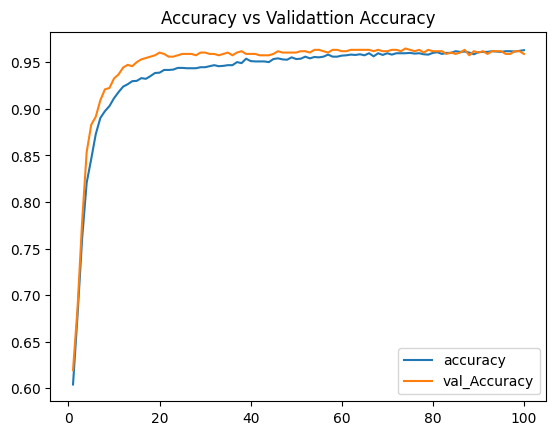

In [188]:
# print(history.history)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_Accuracy')
plt.title('Accuracy vs Validattion Accuracy')
plt.legend()
plt.show()

In [180]:
model.evaluate(X_test, y_test, verbose=2)

27/27 - 0s - 3ms/step - accuracy: 0.9028 - loss: 0.2692


[0.26923614740371704, 0.902810275554657]

In [181]:
old_model = tf.keras.models.load_model('models/ann_loan.keras')

In [182]:
old_model.evaluate(X_test, y_test, verbose=2)

27/27 - 0s - 18ms/step - accuracy: 0.9859 - loss: 0.0496


[0.04961070045828819, 0.9859485030174255]